# Laboratory Exercise: Predicting Champion Picks in the LoL Worlds Final

**Goal:** In this laboratory exercise, you will build a machine learning model capable of predicting whether a League of Legends champion will be selected for the **Season 13 Worlds Final**.
Using detailed performance statistics from **Season 12** and **Season 13**, you will explore, clean, and merge the datasets, construct meaningful features, analyze champion trends, and ultimately train a classification model that identifies which champions are strong enough to appear on the world stage.


## 1. Overview of the Task

You are given two datasets:

- `season_12_data.csv`
- `season_13_data.csv`

Each dataset contains the following features:

- **Name**
  The name of the champion (e.g., *Ahri*, *Garen*, *Lee Sin*).

- **Class**
  The gameplay class or archetype of the champion.
  Possible values include: **Fighter**, **Assassin**, **Mage**, **Marksman**, **Support**, **Tank**.

- **Role**
  The primary lane or position where the champion is played.
  Possible roles: **Top**, **Mid**, **ADC**, **Support**, **Jungle**.

- **Tier**
  The overall performance/strength ranking of the champion for that season.
  Possible tiers: **S+**, **S**, **A**, **B**, **C**, **D**.

- **Trend**
  The performance trend or momentum indicator (e.g., positive/negative score trend across the season).

- **Win %**
  The win rate percentage of the champion in the given role and season (e.g., `51%`).

- **Role %**
  The percentage of games in which this champion is played in the **given role** (e.g., a champion being played top lane 80% of the time).

- **Pick %**
  The pick rate percentage, i.e., how often the champion is selected overall.

- **Ban %**
  The ban rate percentage.
  - This is split by side, e.g., `"Blue (23%) / Red (34%)"`, indicating separate ban rates depending on the team side.

- **KDA**
  The Kill/Death ratio of the champion for the season.

Your final objective is to build a machine learning model that predicts whether a champion will be selected for the **Season 13 Worlds Final** (fictionally played every two seasons).

To achieve this, you will build a complete data-science pipeline:
- Data loading
- Column renaming
- Full outer merging
- Data cleaning (strings, percentages, KDA formatting)
- Handling missing values
- Exploratory Data Analysis (EDA)
- Feature selection
- Categorical encoding
- Target variable creation
- Train–test splitting
- ML model training
- Final evaluation

## 2. Renaming Columns by Season

Both datasets share identical column names.
To avoid confusion after merging, rename all non-key columns so that their season is clearly indicated.

Keep the following **unchanged**:
- `Name`
- `Role`

Rename all other columns using this format:

- `Win % (season 12)`
- `Win % (season 13)`

This ensures clarity and prevents accidental overwriting during merging or preprocessing.

## 3. Full Outer Join on `Name` and `Role`

Perform a **full outer merge** between the two datasets using:

- `Name`
- `Role`

Why full outer join?:
- Some champions exist in Season 13 but not in Season 12 (new releases)
- Some champions exist in Season 12 but only in certain roles, resulting in partial feature availability

A full outer join ensures:
- Champions appearing only in Season 12 are included
- Champions appearing only in Season 13 are included
- Shared champions receive both seasons’ features
- Missing values naturally appear where data is unavailable

After merging:
- Inspect the shape
- Check for missing values
- Show initial descriptive statistics

How to perform the merge:

- `df_full = season12.merge(season13, on=["Name","Role"], how="outer")`

## 4. Cleaning Numeric-Like Columns Stored as Strings

Several columns appear numeric but are actually stored as strings. These must be converted into clean, consistent numerical values before any modeling or missing-value handling.

Examples of problematic formats:

- `"78%"` → should become `78.0`
- `"Blue (23%)/Red (34%)"` → Ban rate split by side

### Your tasks:

1. **Strip percentage symbols (`%`)** from all percentage columns.
2. **Handle the Ban % special case**.
   - The `Ban %` column contains values such as: `"Blue (23%)/Red (34%)"`
   - Take the **sum** of them: `sum(23, 34)`
3. **Convert all cleaned values to `float`**
4. Ensure that all missing values stay **`NaN`**

This preprocessing step must be completed **before handling missing values**

## 5. Handling Missing Values

You must:

- Analyze why values are missing
- Apply appropriate techniques:
  - **Simple Imputation (mean, mode, median)**
  - **Advanced Imputation (MICE, KNN)**
  - **Dropping rows/columns** when justified

Your decisions must be motivated.

## 6. Exploratory Data Analysis (EDA)

Perform EDA to understand data patterns, distributions, and relationships.

Suggested visualizations:

- Distribution plots (histograms)
- Boxplots for numeric columns
- Correlation heatmap (numeric features)
- Role distribution (Season 12 & 13)
- Tier distribution
- Missing-value visualization heatmap

Use visualizations to justify feature selection and preprocessing choices.

## 7. Feature Selection

Not all features are equally valuable.
You must determine:

- Which numeric features matter most
- Which categorical features are useful
- Whether any columns are redundant or irrelevant

## 8. Creating the Target Column: `World Cup Suitable`

Create a new binary label based on Tier performance:

### A champion is labeled **1 (World Cup Suitable)** if:

- `Tier (season 12)` is **S+**,
  **OR**
- `Tier (season 13)` is **S** or **S+**

Otherwise → label **0**.

This new column will be your **prediction target**.

After generating the label:

- Decide whether to drop or encode the Tier columns
- Ensure proper categorical encoding if kept

## 9. Encoding Categorical Features

Choose the encoding strategy:

- **One-Hot Encoding**
- **Ordinal Encoding**

## 10. Train–Test Split

Split your dataset into:

- **Training set** (80%)
- **Test set** (20%)

## 11. Model Training

Train at least one classification model

## 12. Model Evaluation

Evaluate your model using classification metrics

In [3]:
# Your code here

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, cross_val_score
from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error,
    mean_squared_error,
    root_mean_squared_error,
    r2_score,
    confusion_matrix,
    classification_report,
)
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import (
    LinearRegression,
    Lasso,
    Ridge,
    LassoCV,
    RidgeCV,
    LogisticRegression,
)
from sklearn.experimental import enable_iterative_imputer

from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.preprocessing import (
    MinMaxScaler,
    LabelEncoder,
    OrdinalEncoder,
)
import re 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    LabelEncoder,
    OneHotEncoder,
    OrdinalEncoder,
)
from sklearn.linear_model import (
    LinearRegression,
    Lasso,
    Ridge,
    LassoCV,
    RidgeCV,
    LogisticRegression,
)
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
#2
season_12_df = pd.read_csv("season_12_data.csv")
season_13_df = pd.read_csv("season_13_data.csv")

In [5]:
season_12_df.sample()

,Name,Class,Role,Tier,Trend,Win %,Role %,Pick %,Ban %,KDA
173,Taliyah,Mage,MID,C,0.0,50.43%,16.58%,0.25%,Blue (0.07%)/Red (0.12%),2.47


In [6]:
season_13_df.sample()

,Name,Class,Role,Tier,Trend,Win %,Role %,Pick %,Ban %,KDA
5,Akshan,Marksman,TOP,B,2.61,51.69%,25.56%,1.01%,Blue (1.56%)/Red (2.23%),2.0


In [7]:
season_12_df = season_12_df.rename(columns={col: f"{col} (season 12)" for col in season_12_df.columns if col not in ["Name", "Role"]})
season_13_df = season_13_df.rename(columns={col: f"{col} (season 13)" for col in season_13_df.columns if col not in ["Name", "Role"]})

In [8]:
season_12_df.sample()

,Name,Class (season 12),Role,Tier (season 12),Trend (season 12),Win % (season 12),Role % (season 12),Pick % (season 12),Ban % (season 12),KDA (season 12)
185,Tryndamere,Fighter,MID,C,-6.63,49.93%,12.91%,0.82%,Blue (7.18%)/Red (5.54%),2.09


In [9]:
season_13_df.sample()

,Name,Class (season 13),Role,Tier (season 13),Trend (season 13),Win % (season 13),Role % (season 13),Pick % (season 13),Ban % (season 13),KDA (season 13)
66,Jax,Fighter,JUNGLE,C,13.6,49.80%,11.19%,1.58%,Blue (3.06%)/Red (18.79%),2.21


In [ ]:
#3

In [41]:
df_full = season_12_df.merge(season_13_df, on=["Name","Role"], how="outer")

In [42]:
df_full.head()

,Name,Class (season 12),Role,Tier (season 12),Trend (season 12),Win % (season 12),Role % (season 12),Pick % (season 12),Ban % (season 12),KDA (season 12),Class (season 13),Tier (season 13),Trend (season 13),Win % (season 13),Role % (season 13),Pick % (season 13),Ban % (season 13),KDA (season 13)
0,Aatrox,Fighter,TOP,A,6.52,49.97%,94.62%,4.43%,Blue (0.83%)/Red (1.2%),1.97,Fighter,S,-31.86,47.68%,91.63%,6.62%,Blue (9.8%)/Red (2.18%),1.77
1,Ahri,Mage,MID,A,-0.24,49.93%,93.47%,4.62%,Blue (0.2%)/Red (0.84%),2.56,Mage,S,4.55,49.50%,94.65%,5.81%,Blue (1.54%)/Red (0.19%),2.58
2,Akali,Assassin,MID,S,6.51,48.59%,65.65%,8.16%,Blue (6.51%)/Red (6.37%),2.34,Assassin,S,4.33,48.41%,75.74%,8.11%,Blue (5.74%)/Red (7.28%),2.37
3,Akali,Assassin,TOP,A,3.34,48.57%,34.06%,4.24%,Blue (5.57%)/Red (7.31%),2.04,Assassin,C,-1.51,45.92%,23.50%,2.55%,Blue (0.47%)/Red (12.55%),2.00
4,Akshan,Marksman,MID,S,0.65,51.46%,58.01%,4.83%,Blue (5.07%)/Red (16.84%),2.23,Marksman,A,0.34,51.62%,66.03%,2.75%,Blue (0.06%)/Red (3.73%),2.26


In [43]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                258 non-null    object 
 1   Class (season 12)   231 non-null    object 
 2   Role                258 non-null    object 
 3   Tier (season 12)    232 non-null    object 
 4   Trend (season 12)   232 non-null    float64
 5   Win % (season 12)   232 non-null    object 
 6   Role % (season 12)  232 non-null    object 
 7   Pick % (season 12)  232 non-null    object 
 8   Ban % (season 12)   232 non-null    object 
 9   KDA (season 12)     232 non-null    float64
 10  Class (season 13)   244 non-null    object 
 11  Tier (season 13)    244 non-null    object 
 12  Trend (season 13)   244 non-null    float64
 13  Win % (season 13)   244 non-null    object 
 14  Role % (season 13)  244 non-null    object 
 15  Pick % (season 13)  244 non-null    object 
 16  Ban % (s

In [44]:
percentage_columns = [
    "Win % (season 12)", "Role % (season 12)", "Pick % (season 12)",
    "Win % (season 13)", "Role % (season 13)", "Pick % (season 13)"
]
# df_full["Win % (season 12)"] = df_full["Win % (season 12)"].apply(lambda text: re.findall(r"\d+\.?\d+",text)[0] if not pd.isna(text) else np.nan)
# df_full["Win % (season 12)"] = df_full["Win % (season 12)"].astype(float)
for col in percentage_columns:
    df_full[col] = df_full[col].apply(
        lambda text: float(re.findall(r'\d+\.?\d+', str(text))[0]) if not pd.isna(text) else np.nan
    )


In [45]:
df_full.head()

,Name,Class (season 12),Role,Tier (season 12),Trend (season 12),Win % (season 12),Role % (season 12),Pick % (season 12),Ban % (season 12),KDA (season 12),Class (season 13),Tier (season 13),Trend (season 13),Win % (season 13),Role % (season 13),Pick % (season 13),Ban % (season 13),KDA (season 13)
0,Aatrox,Fighter,TOP,A,6.52,49.97,94.62,4.43,Blue (0.83%)/Red (1.2%),1.97,Fighter,S,-31.86,47.68,91.63,6.62,Blue (9.8%)/Red (2.18%),1.77
1,Ahri,Mage,MID,A,-0.24,49.93,93.47,4.62,Blue (0.2%)/Red (0.84%),2.56,Mage,S,4.55,49.50,94.65,5.81,Blue (1.54%)/Red (0.19%),2.58
2,Akali,Assassin,MID,S,6.51,48.59,65.65,8.16,Blue (6.51%)/Red (6.37%),2.34,Assassin,S,4.33,48.41,75.74,8.11,Blue (5.74%)/Red (7.28%),2.37
3,Akali,Assassin,TOP,A,3.34,48.57,34.06,4.24,Blue (5.57%)/Red (7.31%),2.04,Assassin,C,-1.51,45.92,23.50,2.55,Blue (0.47%)/Red (12.55%),2.00
4,Akshan,Marksman,MID,S,0.65,51.46,58.01,4.83,Blue (5.07%)/Red (16.84%),2.23,Marksman,A,0.34,51.62,66.03,2.75,Blue (0.06%)/Red (3.73%),2.26


In [47]:
def preprocess_ban_percentage(value):
    if not pd.isna(value):
        values = re.findall(r'\d+\.?\d+', str(value))  # користиме re.findall
        return sum([float(v) for v in values])
    return np.nan

In [48]:
df_full["Ban % (season 12)"] = df_full["Ban % (season 12)"].apply(preprocess_ban_percentage)
df_full["Ban % (season 13)"] = df_full["Ban % (season 13)"].apply(preprocess_ban_percentage)

In [50]:
df_full.head()

,Name,Class (season 12),Role,Tier (season 12),Trend (season 12),Win % (season 12),Role % (season 12),Pick % (season 12),Ban % (season 12),KDA (season 12),Class (season 13),Tier (season 13),Trend (season 13),Win % (season 13),Role % (season 13),Pick % (season 13),Ban % (season 13),KDA (season 13)
0,Aatrox,Fighter,TOP,A,6.52,49.97,94.62,4.43,2.03,1.97,Fighter,S,-31.86,47.68,91.63,6.62,11.98,1.77
1,Ahri,Mage,MID,A,-0.24,49.93,93.47,4.62,1.04,2.56,Mage,S,4.55,49.50,94.65,5.81,1.73,2.58
2,Akali,Assassin,MID,S,6.51,48.59,65.65,8.16,12.88,2.34,Assassin,S,4.33,48.41,75.74,8.11,13.02,2.37
3,Akali,Assassin,TOP,A,3.34,48.57,34.06,4.24,12.88,2.04,Assassin,C,-1.51,45.92,23.50,2.55,13.02,2.00
4,Akshan,Marksman,MID,S,0.65,51.46,58.01,4.83,21.91,2.23,Marksman,A,0.34,51.62,66.03,2.75,3.79,2.26


In [51]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                258 non-null    object 
 1   Class (season 12)   231 non-null    object 
 2   Role                258 non-null    object 
 3   Tier (season 12)    232 non-null    object 
 4   Trend (season 12)   232 non-null    float64
 5   Win % (season 12)   232 non-null    float64
 6   Role % (season 12)  232 non-null    float64
 7   Pick % (season 12)  232 non-null    float64
 8   Ban % (season 12)   232 non-null    float64
 9   KDA (season 12)     232 non-null    float64
 10  Class (season 13)   244 non-null    object 
 11  Tier (season 13)    244 non-null    object 
 12  Trend (season 13)   244 non-null    float64
 13  Win % (season 13)   244 non-null    float64
 14  Role % (season 13)  244 non-null    float64
 15  Pick % (season 13)  244 non-null    float64
 16  Ban % (s

In [52]:
df_full.isnull().sum()

Name                   0
Class (season 12)     27
Role                   0
Tier (season 12)      26
Trend (season 12)     26
Win % (season 12)     26
Role % (season 12)    26
Pick % (season 12)    26
Ban % (season 12)     26
KDA (season 12)       26
Class (season 13)     14
Tier (season 13)      14
Trend (season 13)     14
Win % (season 13)     14
Role % (season 13)    14
Pick % (season 13)    14
Ban % (season 13)     14
KDA (season 13)       14
dtype: int64

In [53]:
def world_cup_label(row):
    tier12 = row["Tier (season 12)"]
    tier13 = row["Tier (season 13)"]

    # Ако и двете се NaN → врати NaN
    if pd.isna(tier12) and pd.isna(tier13):
        return np.nan
    # Ако е S+ во season 12 или S/S+ во season 13 → 1
    if (tier12 == "S+") or (tier13 in ["S", "S+"]):
        return 1
    # Во спротивно → 0
    return 0
    
df_full["World_Cup_Suitable"] = df_full.apply(world_cup_label, axis=1)

In [55]:
df_full.head()

,Name,Class (season 12),Role,Tier (season 12),Trend (season 12),Win % (season 12),Role % (season 12),Pick % (season 12),Ban % (season 12),KDA (season 12),Class (season 13),Tier (season 13),Trend (season 13),Win % (season 13),Role % (season 13),Pick % (season 13),Ban % (season 13),KDA (season 13),World_Cup_Suitable
0,Aatrox,Fighter,TOP,A,6.52,49.97,94.62,4.43,2.03,1.97,Fighter,S,-31.86,47.68,91.63,6.62,11.98,1.77,1
1,Ahri,Mage,MID,A,-0.24,49.93,93.47,4.62,1.04,2.56,Mage,S,4.55,49.50,94.65,5.81,1.73,2.58,1
2,Akali,Assassin,MID,S,6.51,48.59,65.65,8.16,12.88,2.34,Assassin,S,4.33,48.41,75.74,8.11,13.02,2.37,1
3,Akali,Assassin,TOP,A,3.34,48.57,34.06,4.24,12.88,2.04,Assassin,C,-1.51,45.92,23.50,2.55,13.02,2.00,0
4,Akshan,Marksman,MID,S,0.65,51.46,58.01,4.83,21.91,2.23,Marksman,A,0.34,51.62,66.03,2.75,3.79,2.26,0


In [56]:
df_full.isnull().sum()

Name                   0
Class (season 12)     27
Role                   0
Tier (season 12)      26
Trend (season 12)     26
Win % (season 12)     26
Role % (season 12)    26
Pick % (season 12)    26
Ban % (season 12)     26
KDA (season 12)       26
Class (season 13)     14
Tier (season 13)      14
Trend (season 13)     14
Win % (season 13)     14
Role % (season 13)    14
Pick % (season 13)    14
Ban % (season 13)     14
KDA (season 13)       14
World_Cup_Suitable     0
dtype: int64

In [60]:
df_full["Class (season 12)"].unique()

array(['Fighter', 'Mage', 'Assassin', 'Marksman', 'Tank', nan, 'Support'],
      dtype=object)

In [59]:
df_full["Class (season 13)"].unique()

array(['Fighter', 'Mage', 'Assassin', 'Marksman', 'Tank', nan, 'Support'],
      dtype=object)

<Axes: xlabel='Class (season 12)'>

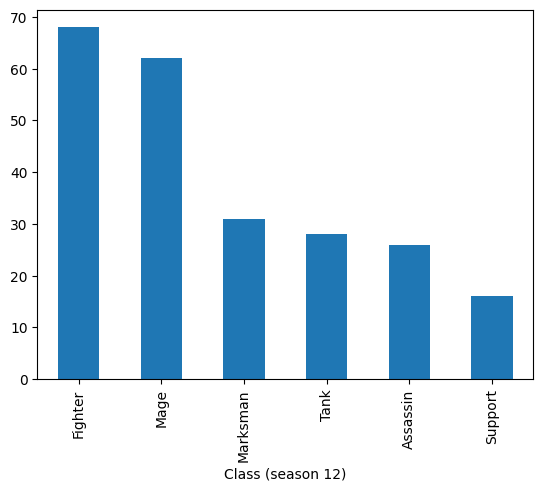

In [62]:
df_full["Class (season 12)"].value_counts().plot.bar()

In [64]:
label_encoder = LabelEncoder()

In [65]:
df_full['Class (season 12)'] = label_encoder.fit_transform(df_full['Class (season 12)'])
label_encoder.classes_

array(['Assassin', 'Fighter', 'Mage', 'Marksman', 'Support', 'Tank', nan],
      dtype=object)

In [66]:
df_full.loc[df_full['Class (season 12)'] == 6, 'Class (season 12)'] = np.nan

In [67]:
df_full['Class (season 13)'] = label_encoder.fit_transform(df_full['Class (season 13)'])
label_encoder.classes_

array(['Assassin', 'Fighter', 'Mage', 'Marksman', 'Support', 'Tank', nan],
      dtype=object)

In [68]:
df_full.loc[df_full['Class (season 13)'] == 6, 'Class (season 13)'] = np.nan

In [70]:
df_full.head()

,Name,Class (season 12),Role,Tier (season 12),Trend (season 12),Win % (season 12),Role % (season 12),Pick % (season 12),Ban % (season 12),KDA (season 12),Class (season 13),Tier (season 13),Trend (season 13),Win % (season 13),Role % (season 13),Pick % (season 13),Ban % (season 13),KDA (season 13),World_Cup_Suitable
0,Aatrox,1.0,TOP,A,6.52,49.97,94.62,4.43,2.03,1.97,1.0,S,-31.86,47.68,91.63,6.62,11.98,1.77,1
1,Ahri,2.0,MID,A,-0.24,49.93,93.47,4.62,1.04,2.56,2.0,S,4.55,49.50,94.65,5.81,1.73,2.58,1
2,Akali,0.0,MID,S,6.51,48.59,65.65,8.16,12.88,2.34,0.0,S,4.33,48.41,75.74,8.11,13.02,2.37,1
3,Akali,0.0,TOP,A,3.34,48.57,34.06,4.24,12.88,2.04,0.0,C,-1.51,45.92,23.50,2.55,13.02,2.00,0
4,Akshan,3.0,MID,S,0.65,51.46,58.01,4.83,21.91,2.23,3.0,A,0.34,51.62,66.03,2.75,3.79,2.26,0


In [71]:
df_full["Role"].unique()

array(['TOP', 'MID', 'SUPPORT', 'JUNGLE', 'ADC'], dtype=object)

In [73]:
df_full = pd.concat([df_full, pd.get_dummies(df_full["Role"])], axis=1)
df_full.drop(columns=["Role"], inplace=True)

In [75]:
df_full.head()

,Name,Class (season 12),Tier (season 12),Trend (season 12),Win % (season 12),Role % (season 12),Pick % (season 12),Ban % (season 12),KDA (season 12),Class (season 13),...,Role % (season 13),Pick % (season 13),Ban % (season 13),KDA (season 13),World_Cup_Suitable,ADC,JUNGLE,MID,SUPPORT,TOP
0,Aatrox,1.0,A,6.52,49.97,94.62,4.43,2.03,1.97,1.0,...,91.63,6.62,11.98,1.77,1,False,False,False,False,True
1,Ahri,2.0,A,-0.24,49.93,93.47,4.62,1.04,2.56,2.0,...,94.65,5.81,1.73,2.58,1,False,False,True,False,False
2,Akali,0.0,S,6.51,48.59,65.65,8.16,12.88,2.34,0.0,...,75.74,8.11,13.02,2.37,1,False,False,True,False,False
3,Akali,0.0,A,3.34,48.57,34.06,4.24,12.88,2.04,0.0,...,23.50,2.55,13.02,2.00,0,False,False,False,False,True
4,Akshan,3.0,S,0.65,51.46,58.01,4.83,21.91,2.23,3.0,...,66.03,2.75,3.79,2.26,0,False,False,True,False,False


In [76]:
df_full["Tier (season 12)"].unique()

array(['A', 'S', 'B', 'C', 'D', nan, 'S+'], dtype=object)

In [78]:
df_full["Tier (season 13)"].unique()

array(['S', 'C', 'A', 'B', nan, 'D', 'S+'], dtype=object)

In [79]:
df_full.drop(columns=["Tier (season 12)"], inplace=True)

In [80]:
df_full.drop(columns=["Tier (season 13)"], inplace=True)

In [81]:
df_full.drop(columns=["Name"], inplace=True)

In [82]:
df_full.head()

,Class (season 12),Trend (season 12),Win % (season 12),Role % (season 12),Pick % (season 12),Ban % (season 12),KDA (season 12),Class (season 13),Trend (season 13),Win % (season 13),Role % (season 13),Pick % (season 13),Ban % (season 13),KDA (season 13),World_Cup_Suitable,ADC,JUNGLE,MID,SUPPORT,TOP
0,1.0,6.52,49.97,94.62,4.43,2.03,1.97,1.0,-31.86,47.68,91.63,6.62,11.98,1.77,1,False,False,False,False,True
1,2.0,-0.24,49.93,93.47,4.62,1.04,2.56,2.0,4.55,49.50,94.65,5.81,1.73,2.58,1,False,False,True,False,False
2,0.0,6.51,48.59,65.65,8.16,12.88,2.34,0.0,4.33,48.41,75.74,8.11,13.02,2.37,1,False,False,True,False,False
3,0.0,3.34,48.57,34.06,4.24,12.88,2.04,0.0,-1.51,45.92,23.50,2.55,13.02,2.00,0,False,False,False,False,True
4,3.0,0.65,51.46,58.01,4.83,21.91,2.23,3.0,0.34,51.62,66.03,2.75,3.79,2.26,0,False,False,True,False,False


In [83]:
df_full.isnull().sum()

Class (season 12)     27
Trend (season 12)     26
Win % (season 12)     26
Role % (season 12)    26
Pick % (season 12)    26
Ban % (season 12)     26
KDA (season 12)       26
Class (season 13)     14
Trend (season 13)     14
Win % (season 13)     14
Role % (season 13)    14
Pick % (season 13)    14
Ban % (season 13)     14
KDA (season 13)       14
World_Cup_Suitable     0
ADC                    0
JUNGLE                 0
MID                    0
SUPPORT                0
TOP                    0
dtype: int64

In [ ]:
#kategoriski: class,
#Numericki: trend,win %, role %, ban%, kda,pick 

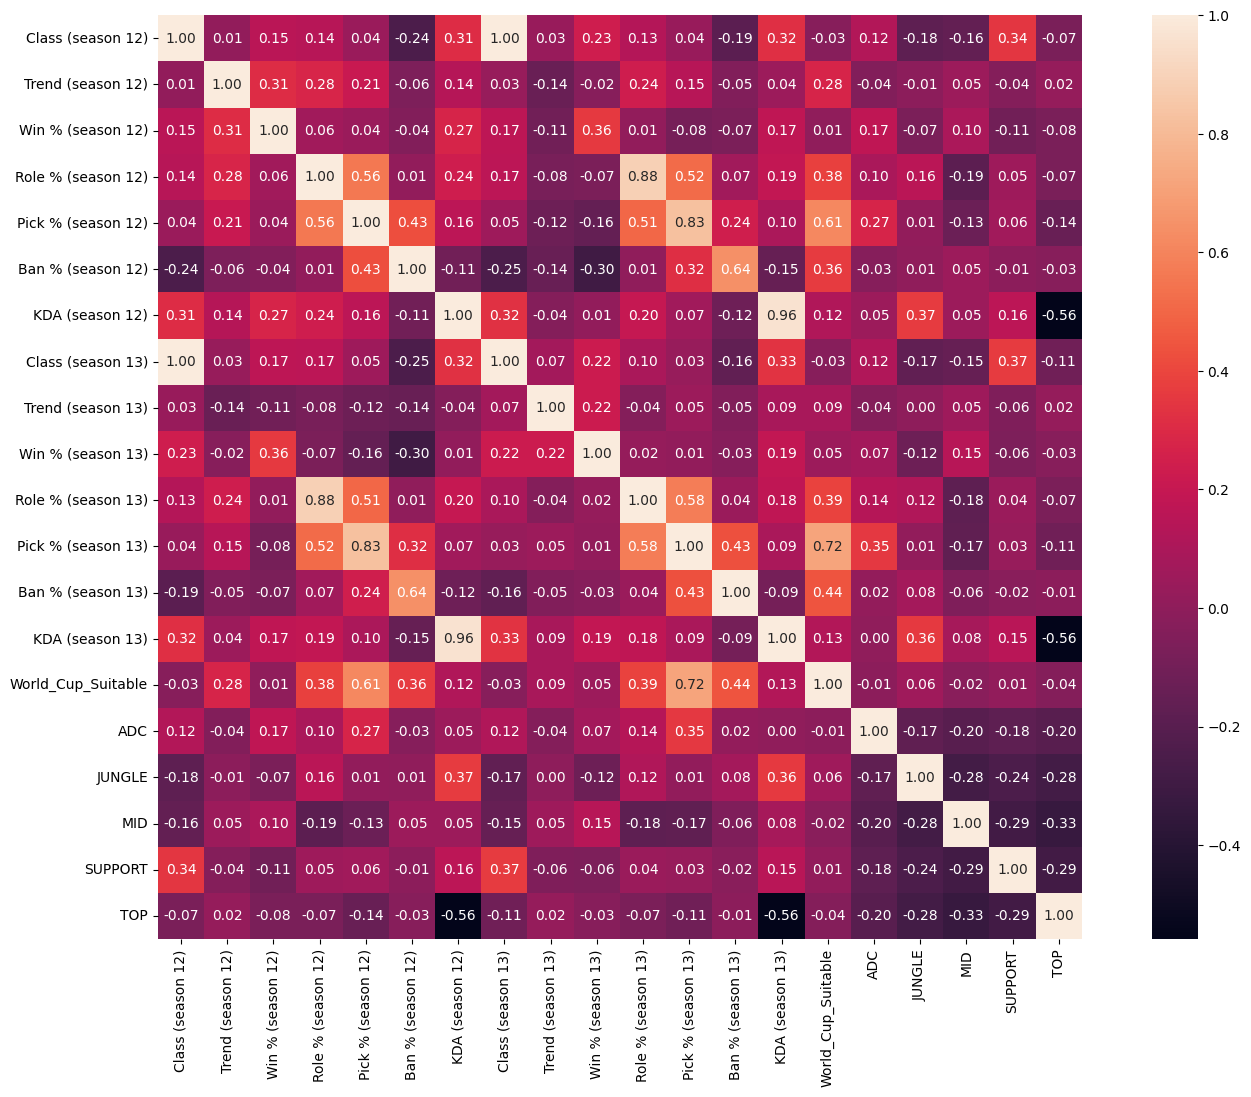

In [88]:
plt.figure(figsize=(18, 12))
sns.heatmap(df_full.corr(numeric_only=True), annot=True, fmt=".2f", square=True)
plt.show()

In [89]:
knn_imputer = KNNImputer(n_neighbors=5)
df_full['Class (season 12)'] = knn_imputer.fit_transform(df_full[['Class (season 12)']])

In [90]:
knn_imputer = KNNImputer(n_neighbors=5)
df_full['Class (season 13)'] = knn_imputer.fit_transform(df_full[['Class (season 13)']])

<Axes: >

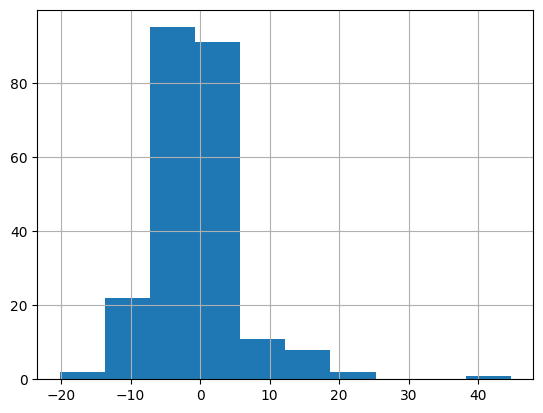

In [93]:
df_full["Trend (season 12)"].hist()

In [94]:
median_imputer = SimpleImputer(strategy="median")
df_full[['Trend (season 12)']] = median_imputer.fit_transform(df_full[['Trend (season 12)']])

<Axes: >

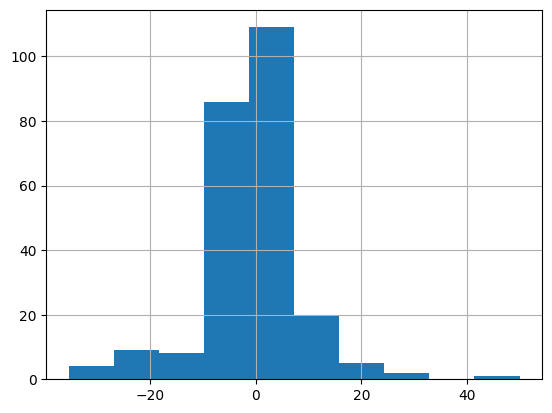

In [95]:
df_full["Trend (season 13)"].hist()

In [96]:
mean_imputer = SimpleImputer(strategy="mean")
df_full[['Trend (season 13)']] = mean_imputer.fit_transform(df_full[['Trend (season 13)']])

<Axes: >

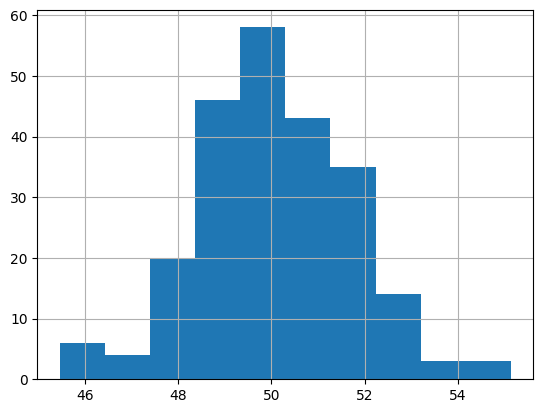

In [97]:
df_full["Win % (season 12)"].hist()

In [99]:
df_full[['Win % (season 12)']] = mean_imputer.fit_transform(df_full[['Win % (season 12)']])

<Axes: >

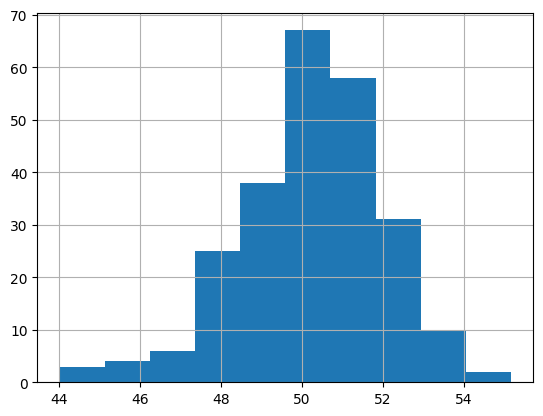

In [98]:
df_full["Win % (season 13)"].hist()

In [100]:
df_full[['Win % (season 13)']] = median_imputer.fit_transform(df_full[['Win % (season 13)']])

<Axes: >

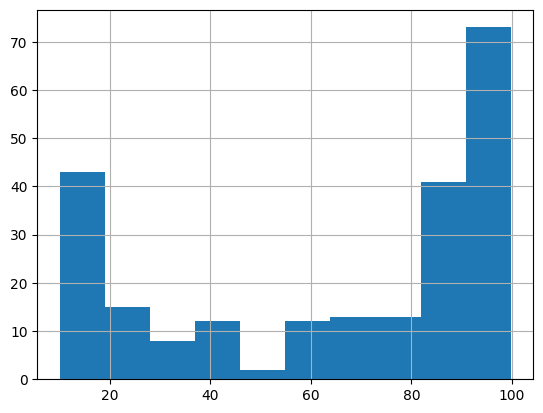

In [101]:
df_full["Role % (season 12)"].hist()

<Axes: >

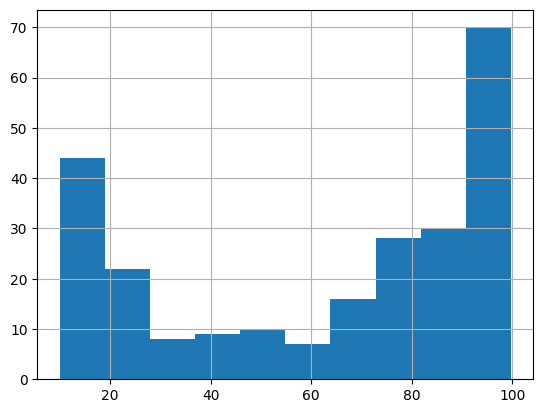

In [102]:
df_full["Role % (season 13)"].hist()

<Axes: >

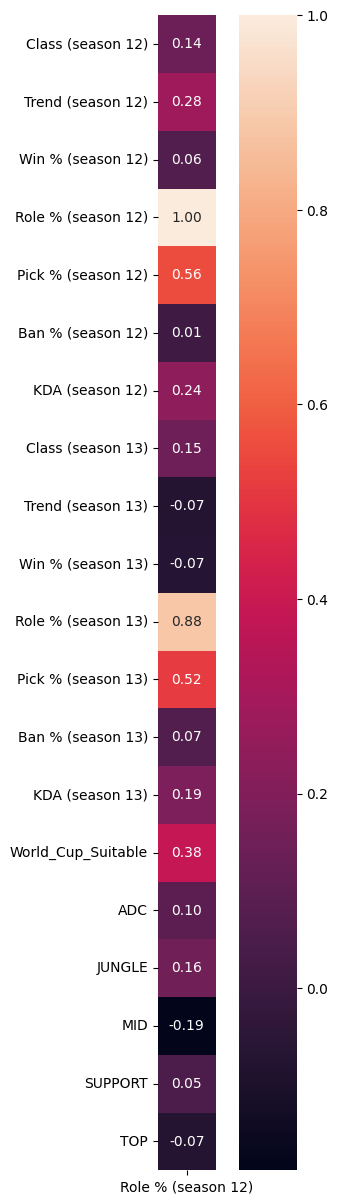

In [108]:
plt.figure(figsize=(6, 15)) 
sns.heatmap(df_full.corr(numeric_only=True)[["Role % (season 12)"]], annot=True, fmt=".2f", square=True)


In [109]:
cols = ["Role % (season 12)", "Role % (season 13)","Pick % (season 12)","Pick % (season 13)"]
iterative_imputer = IterativeImputer()
df_full[cols] = iterative_imputer.fit_transform(df_full[cols])

<Axes: >

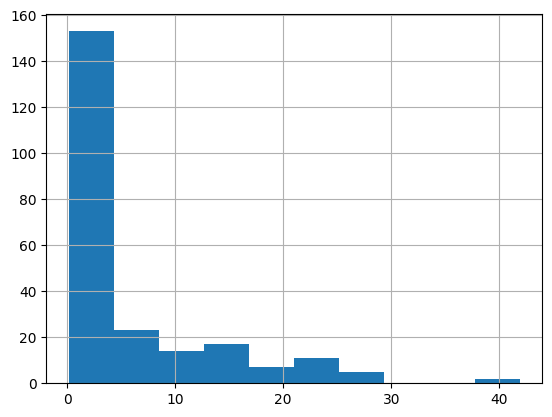

In [110]:
df_full["Ban % (season 12)"].hist()

<Axes: >

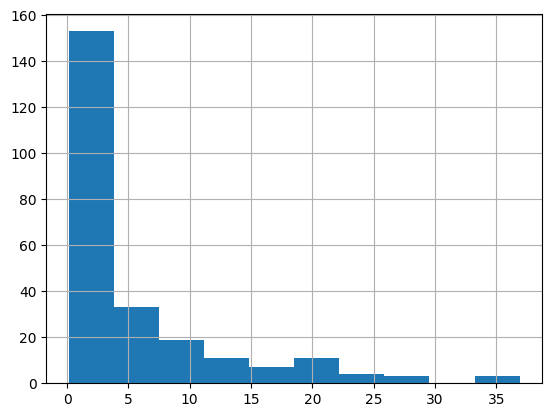

In [111]:
df_full["Ban % (season 13)"].hist()

<Axes: >

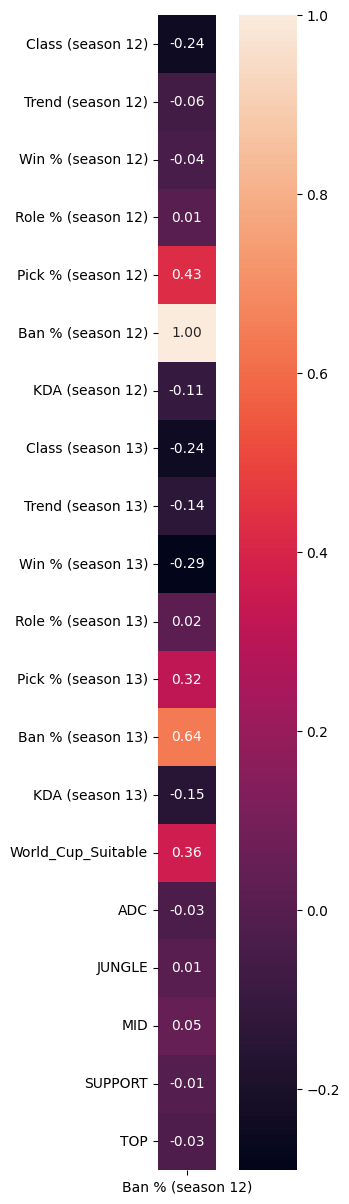

In [112]:
plt.figure(figsize=(6, 15)) 
sns.heatmap(df_full.corr(numeric_only=True)[["Ban % (season 12)"]], annot=True, fmt=".2f", square=True)


In [113]:
cols = ["Ban % (season 12)", "Ban % (season 13)"]
iterative_imputer = IterativeImputer()
df_full[cols] = iterative_imputer.fit_transform(df_full[cols])

In [114]:
df_full.isnull().sum()

Class (season 12)      0
Trend (season 12)      0
Win % (season 12)      0
Role % (season 12)     0
Pick % (season 12)     0
Ban % (season 12)      0
KDA (season 12)       26
Class (season 13)      0
Trend (season 13)      0
Win % (season 13)      0
Role % (season 13)     0
Pick % (season 13)     0
Ban % (season 13)      0
KDA (season 13)       14
World_Cup_Suitable     0
ADC                    0
JUNGLE                 0
MID                    0
SUPPORT                0
TOP                    0
dtype: int64

<Axes: >

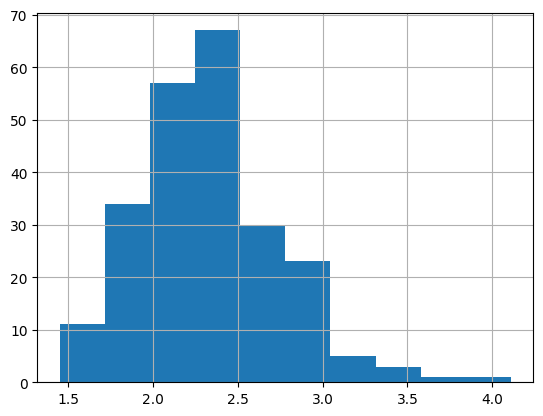

In [115]:
df_full["KDA (season 12)"].hist()

In [117]:
df_full[['KDA (season 12)']] = median_imputer.fit_transform(df_full[['KDA (season 12)']])

<Axes: >

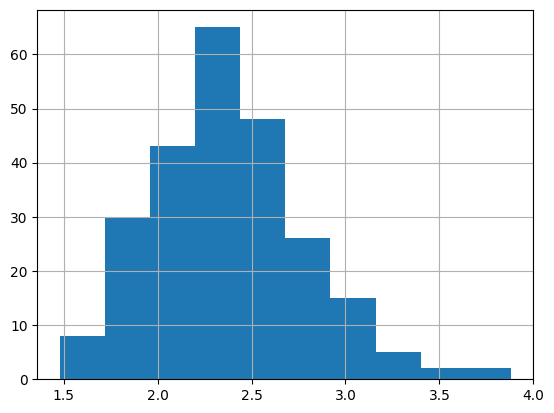

In [116]:
df_full["KDA (season 13)"].hist()

In [118]:
df_full[['KDA (season 13)']] = mean_imputer.fit_transform(df_full[['KDA (season 13)']])

In [119]:
df_full.isnull().sum()

Class (season 12)     0
Trend (season 12)     0
Win % (season 12)     0
Role % (season 12)    0
Pick % (season 12)    0
Ban % (season 12)     0
KDA (season 12)       0
Class (season 13)     0
Trend (season 13)     0
Win % (season 13)     0
Role % (season 13)    0
Pick % (season 13)    0
Ban % (season 13)     0
KDA (season 13)       0
World_Cup_Suitable    0
ADC                   0
JUNGLE                0
MID                   0
SUPPORT               0
TOP                   0
dtype: int64

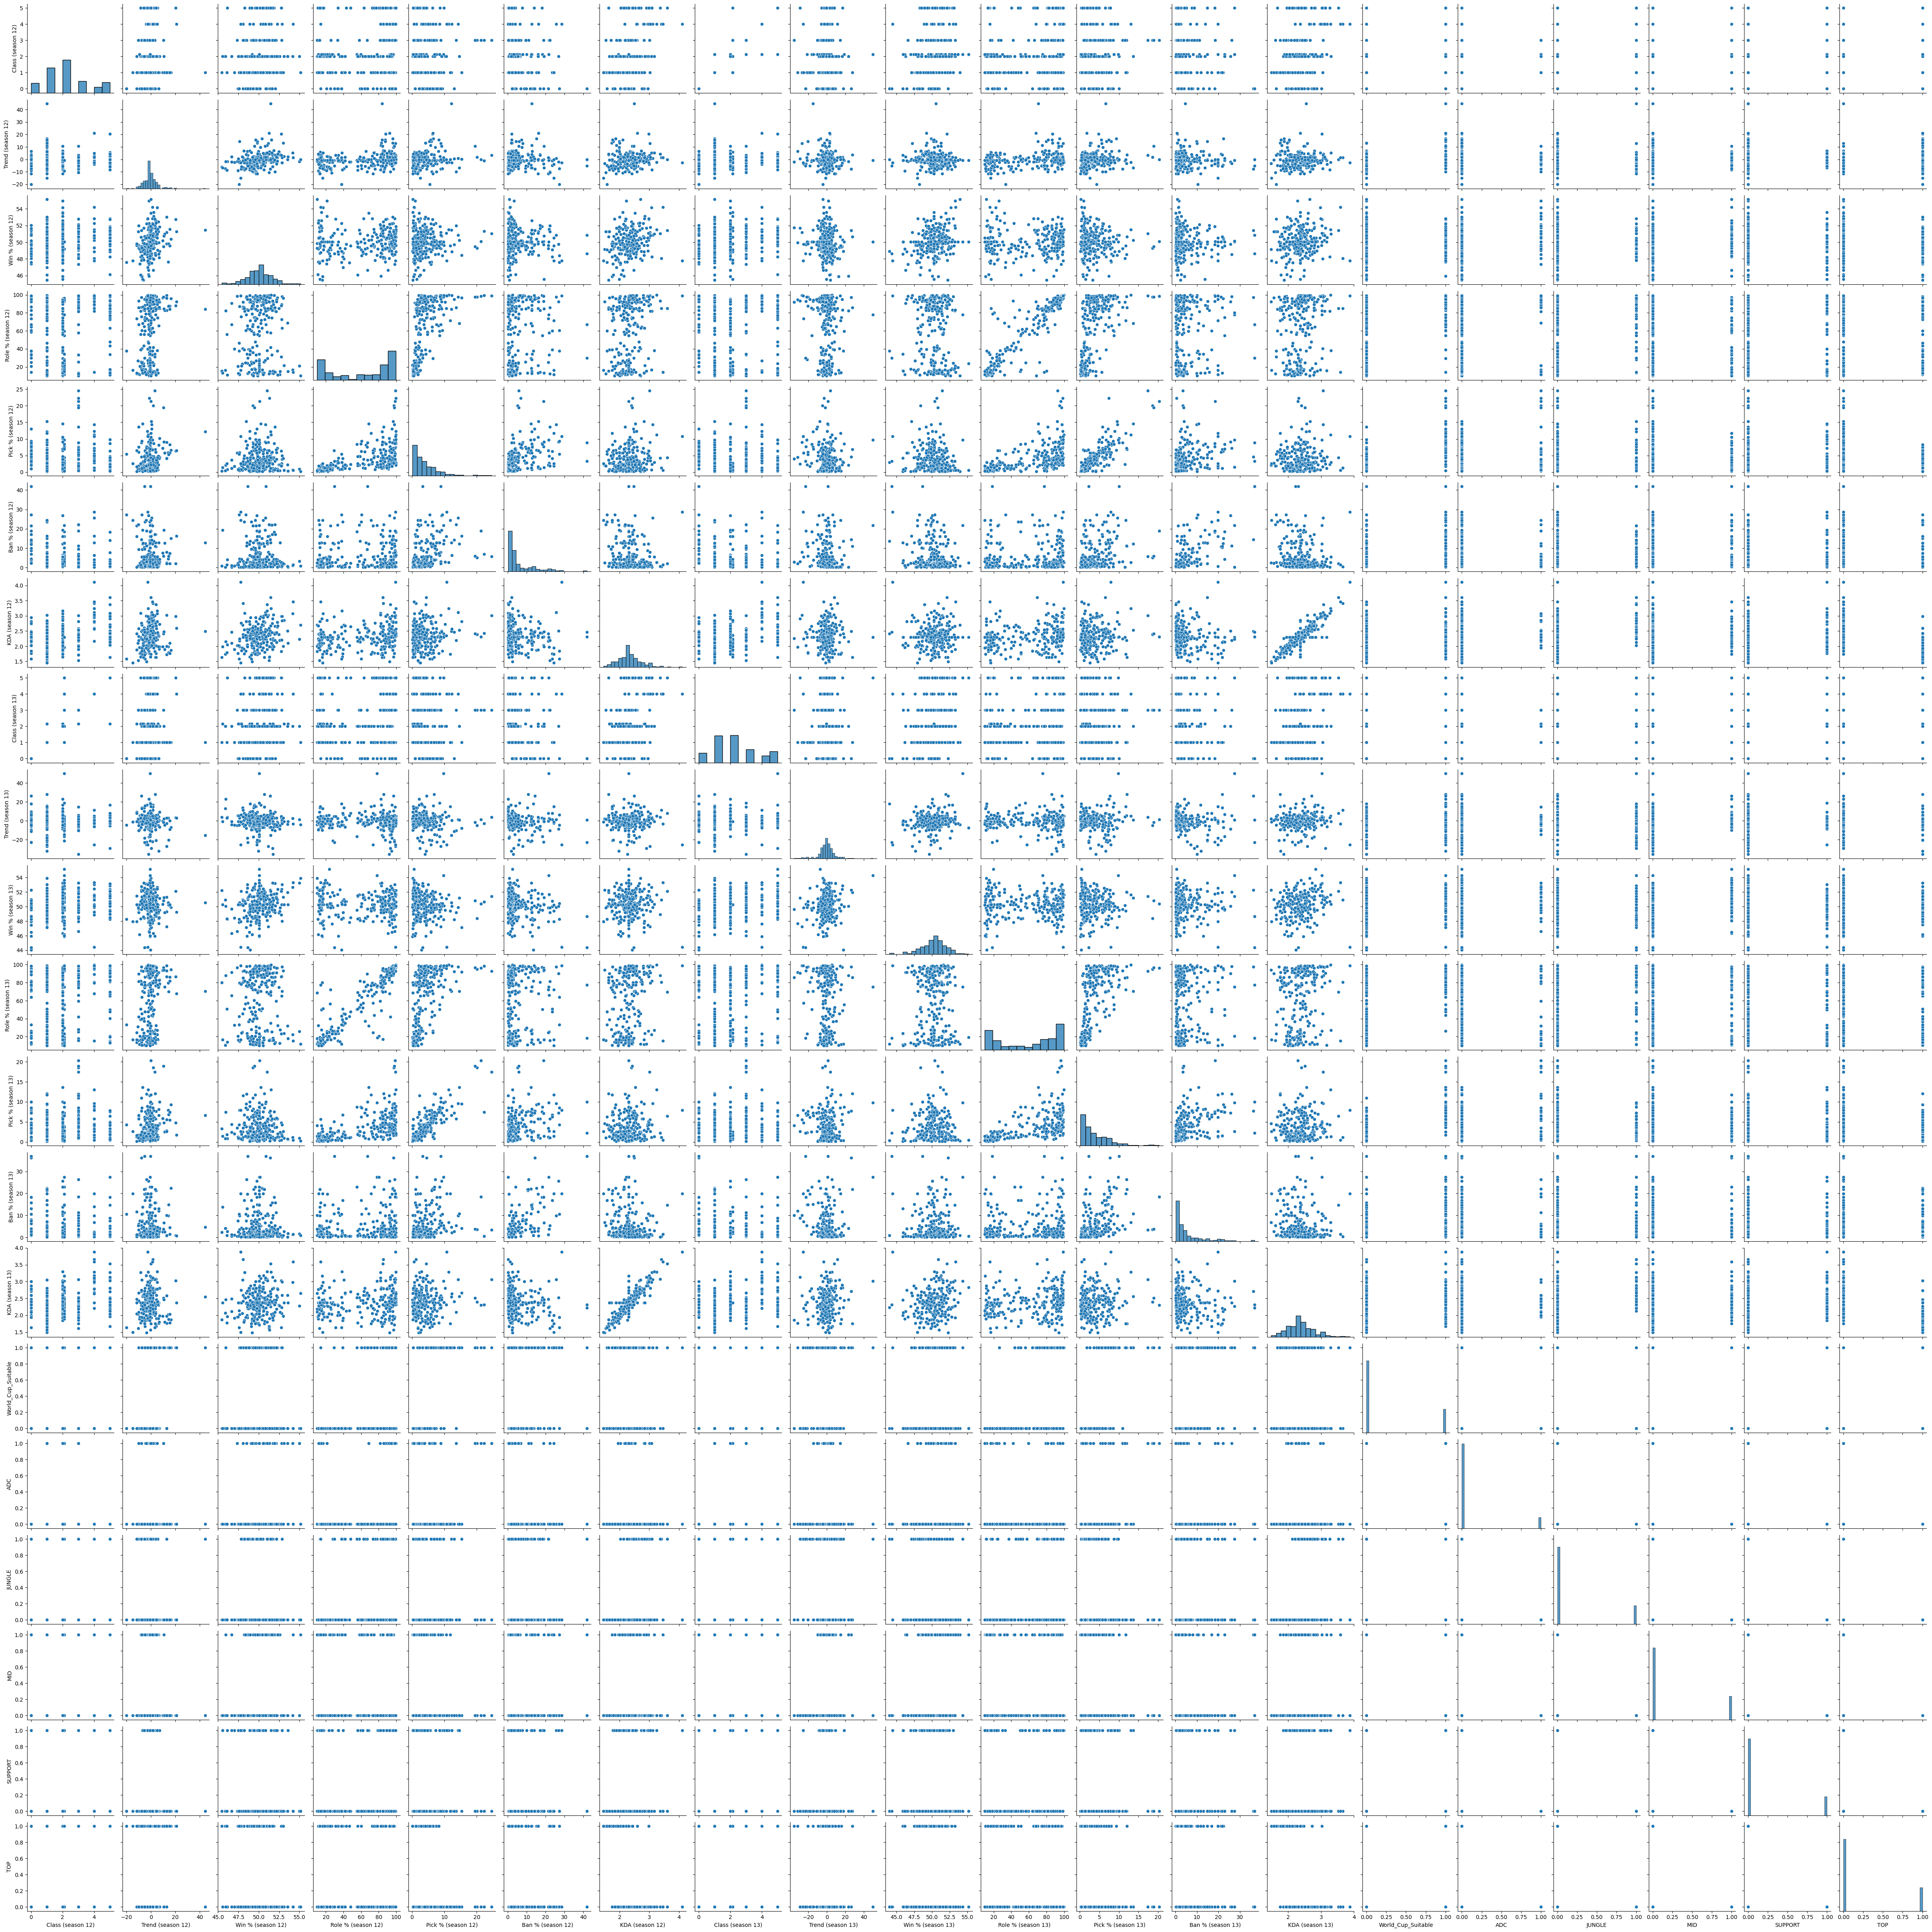

In [120]:
sns.pairplot(df_full)

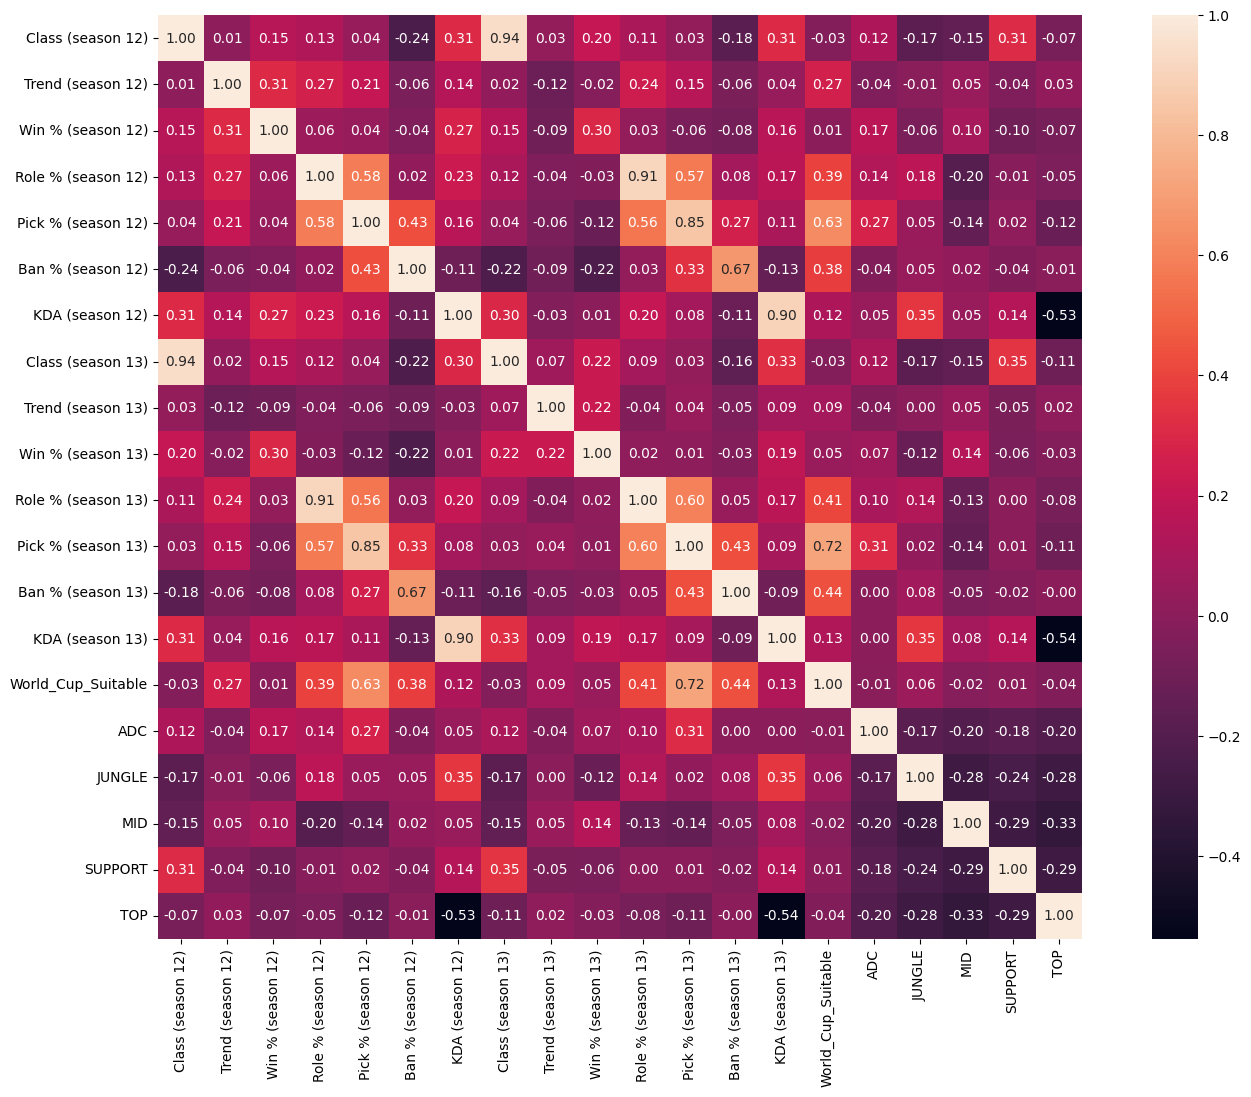

In [121]:
plt.figure(figsize=(18, 12))
sns.heatmap(df_full.corr(numeric_only=True), annot=True, fmt=".2f", square=True)
plt.show()

In [123]:
X, y = df_full.drop(columns=["World_Cup_Suitable"]), df_full["World_Cup_Suitable"]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)
scaler = MinMaxScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)
classifier = LogisticRegression().fit(train_X, train_y)
pred_y = classifier.predict(test_X)


In [124]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89        37
           1       0.88      0.47      0.61        15

    accuracy                           0.83        52
   macro avg       0.85      0.72      0.75        52
weighted avg       0.83      0.83      0.81        52



In [126]:
df_full['World_Cup_Suitable'].value_counts()

World_Cup_Suitable
0    194
1     64
Name: count, dtype: int64

In [ ]:
#ne e balansiran datasetot pravime underfit

In [127]:
data_suitable = df_full.loc[df_full['World_Cup_Suitable'] == 1]
data_suitable

,Class (season 12),Trend (season 12),Win % (season 12),Role % (season 12),Pick % (season 12),Ban % (season 12),KDA (season 12),Class (season 13),Trend (season 13),Win % (season 13),Role % (season 13),Pick % (season 13),Ban % (season 13),KDA (season 13),World_Cup_Suitable,ADC,JUNGLE,MID,SUPPORT,TOP
0,1.0,6.52,49.97,94.62,4.43,2.03,1.97,1.0,-31.86,47.68,91.63,6.62,11.98,1.77,1,False,False,False,False,True
1,2.0,-0.24,49.93,93.47,4.62,1.04,2.56,2.0,4.55,49.50,94.65,5.81,1.73,2.58,1,False,False,True,False,False
2,0.0,6.51,48.59,65.65,8.16,12.88,2.34,0.0,4.33,48.41,75.74,8.11,13.02,2.37,1,False,False,True,False,False
7,5.0,1.72,50.27,83.11,3.13,1.51,2.62,5.0,16.78,52.87,49.07,4.44,5.20,2.82,1,False,True,False,False,False
9,2.0,-1.26,51.97,82.16,3.32,3.03,2.66,2.0,9.21,53.22,86.04,3.60,3.56,3.03,1,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,1.0,-0.04,49.56,71.44,11.77,24.41,1.74,1.0,14.87,49.44,72.19,11.73,19.86,1.75,1,False,False,True,False,False
241,0.0,-7.47,48.42,60.52,9.35,27.32,1.84,0.0,6.47,50.42,63.80,8.52,10.53,1.94,1,False,False,True,False,False
244,4.0,-2.67,47.77,99.12,10.75,28.68,4.11,4.0,-25.55,44.44,98.81,7.96,19.86,3.88,1,False,False,False,True,False
245,5.0,-0.01,51.43,84.90,4.39,2.11,3.61,5.0,7.78,52.12,69.42,6.49,14.77,3.53,1,False,True,False,False,False


In [128]:
data_not_suitable = df_full.loc[df_full['World_Cup_Suitable'] == 0]
data_not_suitable = data_not_suitable.sample(70)
data_not_suitable

,Class (season 12),Trend (season 12),Win % (season 12),Role % (season 12),Pick % (season 12),Ban % (season 12),KDA (season 12),Class (season 13),Trend (season 13),Win % (season 13),Role % (season 13),Pick % (season 13),Ban % (season 13),KDA (season 13),World_Cup_Suitable,ADC,JUNGLE,MID,SUPPORT,TOP
251,2.000000,-0.600,48.370000,24.850000,0.860000,0.600000,2.36,2.000000,-4.520000,50.440,56.280000,1.400000,0.230000,2.51000,0,False,False,True,False,False
200,3.000000,0.000,49.320000,10.200000,0.480000,2.390000,2.00,3.000000,-0.740000,52.620,17.850000,1.450000,3.710000,2.19000,0,False,False,True,False,False
19,2.116883,-0.815,50.035733,92.328209,4.492548,7.942753,2.30,1.000000,-3.440000,50.940,94.300000,3.890000,8.200000,2.39000,0,False,True,False,False,False
109,5.000000,5.410,51.190000,75.040000,4.680000,4.010000,2.41,5.000000,1.780000,49.540,67.520000,3.360000,2.580000,2.40000,0,False,False,False,False,True
141,0.000000,-0.240,48.920000,37.840000,2.940000,13.690000,2.42,0.000000,17.810000,44.030,11.830000,0.330000,0.940000,2.23000,0,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,2.000000,4.620,49.840000,94.180000,3.620000,1.410000,2.58,2.000000,2.430000,49.140,87.850000,3.450000,1.450000,2.60000,0,False,False,True,False,False
221,2.000000,-6.680,45.550000,13.190000,1.440000,19.250000,1.99,2.159836,-0.677992,50.305,16.793684,1.465817,13.776733,2.37123,0,False,False,False,True,False
128,2.116883,-0.815,50.035733,93.647318,3.368517,5.653465,2.30,3.000000,-10.720000,52.810,96.350000,2.640000,4.990000,2.23000,0,True,False,False,False,False
101,2.116883,-9.250,49.200000,11.490000,0.400000,1.010000,1.96,1.000000,-9.480000,46.170,11.320000,0.370000,1.560000,1.89000,0,False,False,False,False,True


In [129]:
new_data = pd.concat([data_not_suitable, data_suitable])
new_data

,Class (season 12),Trend (season 12),Win % (season 12),Role % (season 12),Pick % (season 12),Ban % (season 12),KDA (season 12),Class (season 13),Trend (season 13),Win % (season 13),Role % (season 13),Pick % (season 13),Ban % (season 13),KDA (season 13),World_Cup_Suitable,ADC,JUNGLE,MID,SUPPORT,TOP
251,2.000000,-0.600,48.370000,24.850000,0.860000,0.600000,2.36,2.0,-4.52,50.44,56.28,1.40,0.23,2.51,0,False,False,True,False,False
200,3.000000,0.000,49.320000,10.200000,0.480000,2.390000,2.00,3.0,-0.74,52.62,17.85,1.45,3.71,2.19,0,False,False,True,False,False
19,2.116883,-0.815,50.035733,92.328209,4.492548,7.942753,2.30,1.0,-3.44,50.94,94.30,3.89,8.20,2.39,0,False,True,False,False,False
109,5.000000,5.410,51.190000,75.040000,4.680000,4.010000,2.41,5.0,1.78,49.54,67.52,3.36,2.58,2.40,0,False,False,False,False,True
141,0.000000,-0.240,48.920000,37.840000,2.940000,13.690000,2.42,0.0,17.81,44.03,11.83,0.33,0.94,2.23,0,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,1.000000,-0.040,49.560000,71.440000,11.770000,24.410000,1.74,1.0,14.87,49.44,72.19,11.73,19.86,1.75,1,False,False,True,False,False
241,0.000000,-7.470,48.420000,60.520000,9.350000,27.320000,1.84,0.0,6.47,50.42,63.80,8.52,10.53,1.94,1,False,False,True,False,False
244,4.000000,-2.670,47.770000,99.120000,10.750000,28.680000,4.11,4.0,-25.55,44.44,98.81,7.96,19.86,3.88,1,False,False,False,True,False
245,5.000000,-0.010,51.430000,84.900000,4.390000,2.110000,3.61,5.0,7.78,52.12,69.42,6.49,14.77,3.53,1,False,True,False,False,False


In [130]:
new_data = new_data.sample(frac=1)
new_data

,Class (season 12),Trend (season 12),Win % (season 12),Role % (season 12),Pick % (season 12),Ban % (season 12),KDA (season 12),Class (season 13),Trend (season 13),Win % (season 13),Role % (season 13),Pick % (season 13),Ban % (season 13),KDA (season 13),World_Cup_Suitable,ADC,JUNGLE,MID,SUPPORT,TOP
140,4.0,-0.91,49.35,88.30,8.57,12.77,2.17,4.0,-4.93,49.29,94.85,8.26,13.91,2.21,1,False,False,False,True,False
89,1.0,1.38,49.95,97.80,9.70,12.18,2.41,1.0,-22.06,48.23,97.18,6.68,5.46,2.39,0,False,True,False,False,False
191,2.0,-5.52,49.22,64.73,1.18,0.19,2.61,2.0,10.06,48.44,37.26,0.96,0.40,2.59,0,False,True,False,False,False
155,1.0,1.29,49.65,13.54,0.31,0.26,2.82,1.0,15.21,47.74,11.62,0.34,0.54,2.80,0,False,True,False,False,False
137,1.0,-10.85,49.68,26.73,0.93,0.89,2.10,1.0,1.97,50.14,31.20,1.74,1.16,2.03,0,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,2.0,-0.14,51.10,84.98,10.55,16.00,2.35,2.0,3.79,51.10,95.85,5.76,2.89,2.32,1,False,False,True,False,False
65,1.0,-1.08,48.24,39.17,4.10,23.51,1.75,1.0,8.17,50.75,50.98,6.70,16.82,1.85,1,False,False,True,False,False
48,1.0,14.31,47.66,87.34,5.92,4.44,1.99,1.0,2.93,50.56,79.71,7.97,9.81,2.02,1,False,False,False,False,True
168,1.0,15.56,49.60,83.89,8.23,7.37,1.76,1.0,-9.00,50.30,81.83,7.40,4.49,1.78,1,False,False,False,False,True


In [133]:
X = new_data.drop(columns=['World_Cup_Suitable'])
y = new_data['World_Cup_Suitable']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)
classifier = LogisticRegression().fit(train_X, train_y)
pred_y = classifier.predict(test_X)

print("Accuracy:",metrics.accuracy_score(test_y, pred_y))
print(confusion_matrix(test_y, pred_y))
print(classification_report(test_y, pred_y))

Accuracy: 0.8888888888888888
[[17  1]
 [ 2  7]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        18
           1       0.88      0.78      0.82         9

    accuracy                           0.89        27
   macro avg       0.88      0.86      0.87        27
weighted avg       0.89      0.89      0.89        27



C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Sega probro predviduva zatoa sto e balansiran

In [134]:
model = XGBClassifier(max_depth=7, min_child_weight=1, n_estimators=50, n_jobs=-1, learning_rate=0.01)
model.fit(train_X, train_y)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [135]:
y_pred = model.predict(test_X)

print("Accuracy:",metrics.accuracy_score(test_y, y_pred))
print(confusion_matrix(test_y, y_pred))
print(classification_report(test_y, y_pred))

Accuracy: 0.9259259259259259
[[18  0]
 [ 2  7]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       1.00      0.78      0.88         9

    accuracy                           0.93        27
   macro avg       0.95      0.89      0.91        27
weighted avg       0.93      0.93      0.92        27

